In [2]:
library(ggplot2)
suppressPackageStartupMessages(library(extraDistr))
suppressPackageStartupMessages(library(distr))
source("./simple.R")
source("./simple_utils.R")
set.seed(2025)
K = 20

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'extraDistr' was built under R version 4.3.3"
Warning message:
"package 'distr' was built under R version 4.3.3"
Warning message:
"package 'startupmsg' was built under R version 4.3.3"
Warning message:
"package 'sfsmisc' was built under R version 4.3.3"


### Q2

In [3]:
# 1
posterior_distribution = function(rho, n_successes, n_observations) {
  K = length(rho) - 1
  gamma = rho * dbinom(n_successes, n_observations, (0:K)/K)
  normalizing_constant = sum(gamma)
  gamma/normalizing_constant
}

In [4]:
# 2
posterior_mean = function(post_dist) {
    return (sum((seq(0, K, 1)/K) * post_dist))
}

In [5]:
seq(0, K, 1)/K

[1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

In [6]:
rho_true = rho_prior = 1:(K+1) 
dist_p = DiscreteDistribution(supp = (1 / K) * (0:K), prob = rho_true / sum(rho_true))
p_true = simulate(dist_p)
replicate(4, simulate(Bern(p_true)))

[1] 1 0 1 0

In [7]:
# 3
simulate_posterior_mean_error = function(rho_true, rho_prior, n_observations){
    dist_p = DiscreteDistribution(supp = (1/K)*(0:K), prob = rho_true/sum(rho_true))
    p_true = simulate(dist_p)
    # Y = rep(simulate(Bern(p_true)), n_observations)
    Y = replicate(n_observations, simulate(Bern(p_true)))
    post_dist = posterior_distribution(rho_prior, sum(Y), n_observations)
    post_mean = posterior_mean(post_dist)
    return (abs(p_true - post_mean))
}

In [8]:
# 4
rho_true = rho_prior = 1:(K+1)
n_obs_vector <- 2^(0:6)
experiment_results = data.frame()
for (n_obs in n_obs_vector) {
    # errors = rep(simulate_posterior_mean_error(rho_true, rho_prior, n_obs), 1000)
    errors = replicate(1000, simulate_posterior_mean_error(rho_true, rho_prior, n_obs))
    df = data.frame(n_observations=rep(n_obs, 1000), replication=(1:1000), errors=errors)
    experiment_results = rbind(experiment_results, df)
}
head(experiment_results)
tail(experiment_results)


,n_observations,replication,errors
,<dbl>,<int>,<dbl>
1,1,1,0.2250
2,1,2,0.1875
3,1,3,0.1125
4,1,4,0.2750
5,1,5,0.2375
6,1,6,0.1250


,n_observations,replication,errors
,<dbl>,<int>,<dbl>
6995,64,995,0.07163862
6996,64,996,0.05179766
6997,64,997,0.06694990
6998,64,998,0.03624271
6999,64,999,0.03815372
7000,64,1000,0.02924495


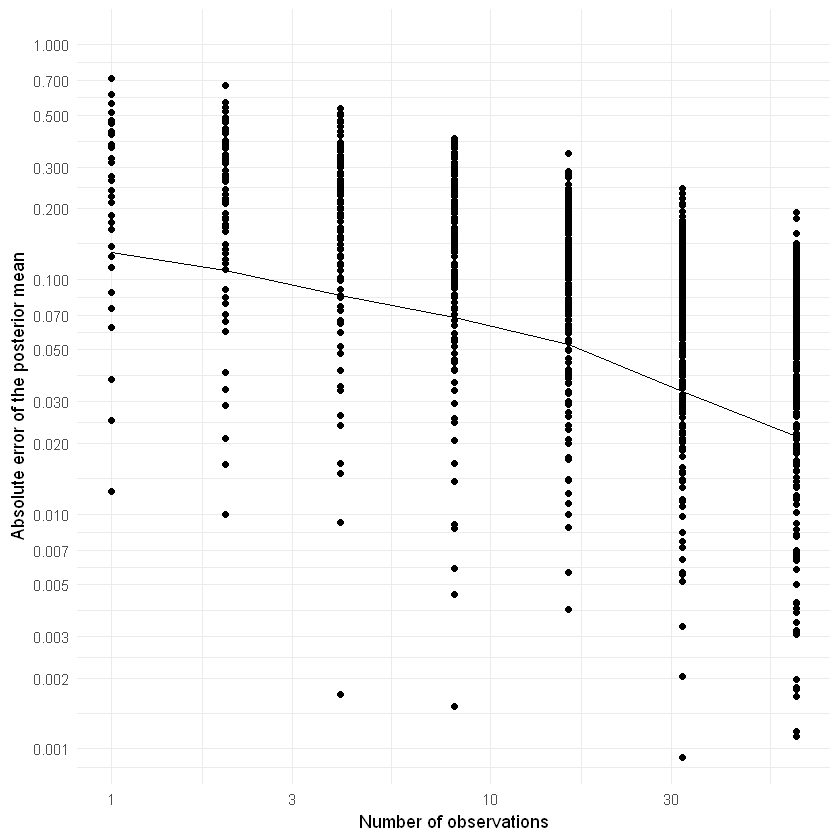

In [9]:
# 5
ggplot(experiment_results, aes(x=n_observations, y=errors+1e-9)) + # avoid log(0)
  stat_summary(fun = mean, geom="line") + # Line averages over 1000 replicates
  scale_x_log10() +  # Show result in log-log scale
  scale_y_log10(n.breaks=16) +
  coord_cartesian(ylim = c(1e-3, 1)) +
  theme_minimal() +
  geom_point() +
  labs(x = "Number of observations",
       y = "Absolute error of the posterior mean")

In [14]:
# 6
y7 = mean(experiment_results[experiment_results$n_observations == 2^6, ]$errors)
y5 = mean(experiment_results[experiment_results$n_observations==2^4, ]$errors)
(log10(y7) - log10(y5)) / (log10(2^6) - log10(2^4))


[1] -0.4969681

In [16]:
y7
y5
y7/y5
2^(-0.496968079903831 * 2)

[1] 0.03702777

[1] 0.07374493

[1] 0.502106

[1] 0.502106

In [ ]:
# 7  
rho_true = 1:(K+1)
rho_prior = rep(1, K + 1)
new_results = data.frame()
for (n_obs in n_obs_vector) {
    errors = replicate(1000, simulate_posterior_mean_error(rho_true, rho_prior, n_obs))
    df = data.frame(n_observations = rep(n_obs, 1000), replication = (1:1000), errors = errors)
    new_results = rbind(new_results, df)
}
new_results$prior_type = rep("Different", 1000*length(n_obs_vector))
experiment_results$prior_type = rep("Match", 1000 * length(n_obs_vector))
all_results = rbind(experiment_results, new_results)

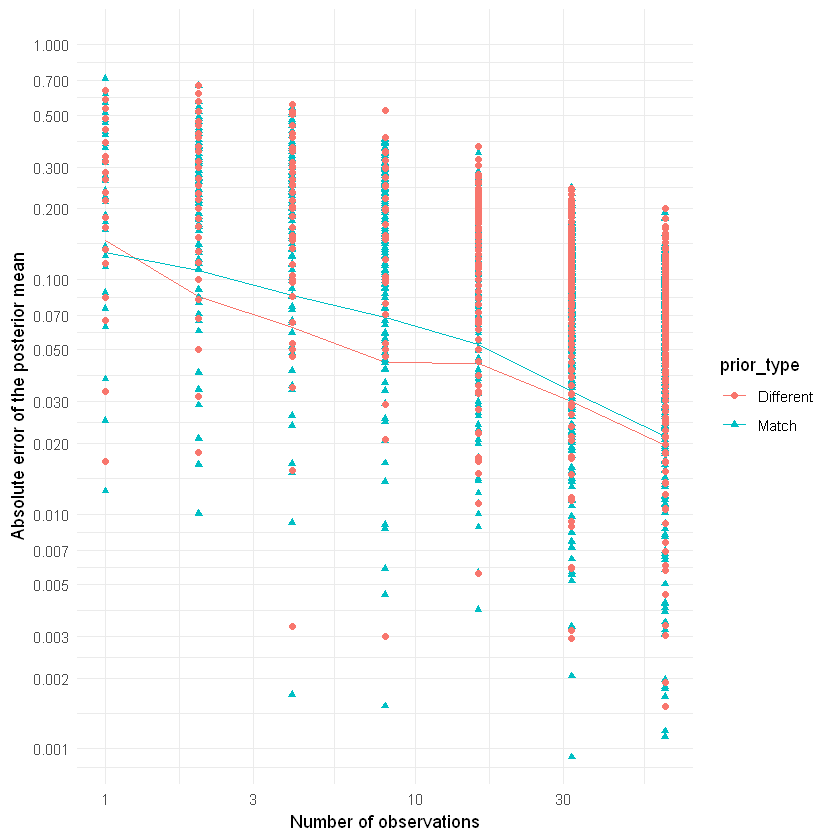

In [13]:
ggplot(all_results, aes(x=n_observations, y=errors+1e-9, # avoid log(0) 
                        color=prior_type, shape=prior_type)) + 
  stat_summary(fun = mean, geom="line") + # Line averages over 1000 replicates
  scale_x_log10() +  # Show result in log-log scale
  scale_y_log10(n.breaks=16) +
  coord_cartesian(ylim = c(1e-3, 1)) +
  theme_minimal() +
  geom_point() +
  labs(x = "Number of observations",
       y = "Absolute error of the posterior mean")